### Principles of Superconducting Quantum Computers
Daniel D. Stancil, Gregory T. Byrd, Wiley, 2022  ISBN: [978-1119750727](https://bcs.wiley.com/he-bcs/Books?action=index&bcsId=12203&itemId=1119750725)

----

## Chapter 2: Physics of Single Qubit Gates
### Gates and Rotations

As described in section 2.2, the operation of a gate can be described as a rotation along the surface of the Bloch sphere. Clockwise rotations around the three axes are described by the following matrices:

$$R_x(\theta) = e^{-i \frac{\theta}{2} \sigma^x} = \begin{bmatrix} \cos \frac{\theta}{2} & -i \sin \frac{\theta}{2} \\ -i \sin \frac{\theta}{2} & \cos \frac{\theta}{2} \end{bmatrix}$$

$$R_y(\theta) = e^{-i \frac{\theta}{2} \sigma^y} = \begin{bmatrix} \cos \frac{\theta}{2} & - \sin \frac{\theta}{2} \\ \sin \frac{\theta}{2} & \cos \frac{\theta}{2} \end{bmatrix}$$

$$R_z(\theta) = e^{-i \frac{\theta}{2} \sigma^z} = \begin{bmatrix} e^{-i \theta/2} & 0 \\ 0 & e^{i \theta/2} \end{bmatrix}$$

Starting from the $|0\rangle$ position, we can get to any other point on the sphere with two rotations:
1. Rotate around the Y axis by an angle $\theta$.
1. Rotate around the Z axis by an angle $\phi$.

As derived in the book:

$$R_z(\phi)R_y(\theta)|0\rangle = e^{-i\phi/2}(\cos \frac{\theta}{2} |0\rangle + e^{i \phi} \sin \frac{\theta}{2}|1\rangle)$$

The *global phase* of $- \phi/2$ does not matter; in fact, two states that differ only by a global phase are indistinguishable. It's common, therefore, to consider angles $\theta$ and $\phi$ when viewing the Bloch sphere. (A global phase is analogous to rotating the entire sphere, rather than rotating around an axis.)


In [4]:
pip install kaleidoscope

Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix, partial_trace
import kaleidoscope.qiskit
from kaleidoscope import qsphere

Traceback (most recent call last):
  Input In [10] in <cell line: 4>
    import kaleidoscope.qiskit
  File /opt/conda/lib/python3.8/site-packages/kaleidoscope/qiskit/__init__.py:24 in <module>
    import kaleidoscope.qiskit.overload
  File /opt/conda/lib/python3.8/site-packages/kaleidoscope/qiskit/overload/__init__.py:51 in <module>
    import kaleidoscope.qiskit.overload.circuit
  File /opt/conda/lib/python3.8/site-packages/kaleidoscope/qiskit/overload/circuit.py:24 in <module>
    from qiskit.providers.basebackend import BaseBackend
ModuleNotFoundError: No module named 'qiskit.providers.basebackend'

Use %tb to get the full traceback.


In [2]:
# if the Bloch spheres stop rendering, try executing this cell
import plotly.io as pio
pio.renderers.default='notebook'

Use the text boxes below to convince yourself by entering angles for $\theta$ and $\phi$. You should be able to reach all other points of the sphere. Each angle is entered as a multiple of $\pi$ -- e.g., a value of $1.5$ for $\frac{3\pi}{2}$. Note that we use the `rz` and `ry` gates from Qiskit to perform the Z and Y rotations.

In [3]:
angley = widgets.BoundedFloatText(value = 0, min = -2, max = 2, step = 0.05, description='Y angle: \u03B8 / \u03C0')
anglez = widgets.BoundedFloatText(value = 0, min = -2, max = 2, step = 0.05, description='Z angle: \u03C6 / \u03C0')
sphere = widgets.interactive_output(show_yz, {'theta': angley, 'phi': anglez})
angles = widgets.VBox([angley, anglez])
angles.layout.align_items='center'
angles.layout.align_content='center'
widgets.HBox([sphere, angles])

While this works well when starting at $|0\rangle$, it's not a general transformation. Consider starting at position $|{+y}\rangle$: the Y rotation has no effect, so you could only reach points along the equator.

NOTE: In the text, the points at the extreme of the $y$-axis are known as $|i\rangle$ and $|{-i}\rangle$. Another common notation is $|r\rangle$ and $|l\rangle$ (for "right" and "left"). This is the notation used in the illustration below, and is used by Qiskit to initialize a state vector.

For a general gate description, we need three rotations, similar to the three axes of rotation of a classical object: pitch, roll, and yaw. There are many conventions for specifying a general rotation. We will use ZYZ, because $z$-axis rotations can be performed easily in superconducting quantum computers.

In the following, choose a starting point, and then specify three angles for the following rotations:
1. Rotate around the Z axis by angle $\lambda$.
1. Rotate around the Y axis by angle $\theta$.
1. Rotate around the Z axis by angle $\phi$.

Following the Qiskit convention, we call this `u3`, and it represents the most general single-qubit unitary gate, ignoring the global phase that results from performing the three rotations.

$$u3(\theta,\phi,\lambda) = \begin{bmatrix} \cos \frac{\theta}{2} & -e^{i\lambda} \sin \frac{\theta}{2} \\
                                e^{i\phi} \sin \frac{\theta}{2} & e^{i(\phi + \lambda)} \cos \frac{\theta}{2} 
                                \end{bmatrix}$$

In [4]:
style = {'description_width': '110px'}
pos = widgets.Dropdown(options=['0', '1', '+', '-', 'r', 'l'], value='+', description='start', style=style)
z1 = widgets.BoundedFloatText(value = 0, min = -2, max = 2, step = 0.05, description='1st Z angle: \u03BB / \u03C0',
                             style=style)
y = widgets.BoundedFloatText(value = 0, min = -2, max = 2, step = 0.05, description='Y angle: \u03B8 / \u03C0',
                            style=style)
z2 = widgets.BoundedFloatText(value = 0, min = -2, max = 2, step = 0.05, description='2nd Z angle: \u03C6 / \u03C0',
                             style=style)
sphere = widgets.interactive_output(show_zyz, {'start': pos, 'lbda': z1, 'theta': y, 'phi': z2})
params = widgets.VBox([pos, z1, y, z2])
params.layout.align_items='center'
params.layout.align_content='center'
widgets.HBox([sphere, params])

#### Exercises
Using the interactive illustration above, demonstrate the following equivalences described in the book for the Qiskit universal gate: $u3(\theta, \psi, \lambda).  Pay attention to the order of angles in the parameter list. Try with different starting points to convince yourself that the gate acts correctly.

$$ X = u3(\pi, 0, \pi)$$

$$ Y = u3(\pi, \pi/2, \pi/2)$$

$$ H = u3(\pi/2, 0, \pi)$$

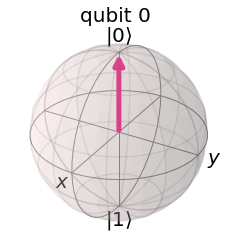

In [15]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# Define the initial state |0>
qc = QuantumCircuit(1)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend=backend).result()
psi = result.get_statevector()
plot_bloch_multivector(psi)


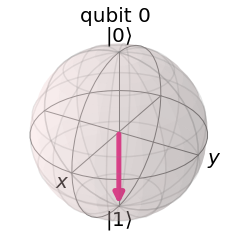

In [16]:
# Apply X gate
qc = QuantumCircuit(1)
qc.x(0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend=backend).result()
psi = result.get_statevector()
plot_bloch_multivector(psi)


/tmp/ipykernel_241/3742503272.py:3: DeprecationWarning:

The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).



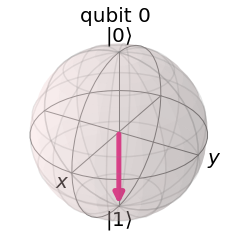

In [17]:
# Apply u3(pi, 0, pi) gate
qc = QuantumCircuit(1)
qc.u3(pi, 0, pi, 0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend=backend).result()
psi = result.get_statevector()
plot_bloch_multivector(psi)

/tmp/ipykernel_241/1001510270.py:11: DeprecationWarning:

The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).



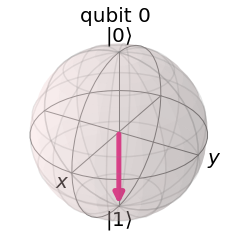

In [19]:
# Apply Y gate
qc = QuantumCircuit(1)
qc.y(0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend=backend).result()
psi = result.get_statevector()
plot_bloch_multivector(psi)

# Apply u3(pi, pi/2, pi/2) gate
qc = QuantumCircuit(1)
qc.u3(pi, pi/2, pi/2, 0)
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend=backend).result()
psi = result.get_statevector()
plot_bloch_multivector(psi)

In [21]:
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Statevector
from math import pi

# Define the statevector corresponding to the |0⟩ state
initial_state = Statevector.from_label('0')

# Define the U3 gates
u3_x = ['X', [pi, 0, pi]]
u3_y = ['Y', [pi, pi/2, pi/2]]
u3_h = ['H', [pi/2, 0, pi]]

# Apply the U3 gates to the initial state
final_state_x = initial_state.evolve(u3_x)
final_state_y = initial_state.evolve(u3_y)
final_state_h = initial_state.evolve(u3_h)

# Visualize the final states on the Bloch sphere
plot_bloch_vector(final_state_x.data, title='X = u3(pi, 0, pi)')
plot_bloch_vector(final_state_y.data, title='Y = u3(pi, pi/2, pi/2)')
plot_bloch_vector(final_state_h.data, title='H = u3(pi/2, 0, pi)')


Traceback (most recent call last):
  Input In [21] in <cell line: 14>
    final_state_x = initial_state.evolve(u3_x)
  File /opt/conda/lib/python3.8/site-packages/qiskit/quantum_info/states/statevector.py:392 in evolve
    other = Operator(other, input_dims=dims, output_dims=dims)
  File /opt/conda/lib/python3.8/site-packages/qiskit/quantum_info/operators/operator.py:76 in __init__
    self._data = np.asarray(data, dtype=complex)
ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

Use %tb to get the full traceback.


/tmp/ipykernel_241/3435817193.py:6: DeprecationWarning:

The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).

/tmp/ipykernel_241/3435817193.py:8: DeprecationWarning:

The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).

/tmp/ipykernel_241/3435817193.py:10: DeprecationWarning:

The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumC

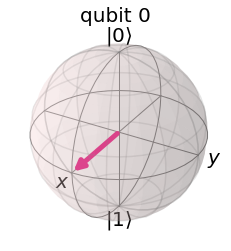

In [22]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector

# Define the circuit with the desired gate
qc_x = QuantumCircuit(1)
qc_x.u3(3.1416, 0, 3.1416, 0)
qc_y = QuantumCircuit(1)
qc_y.u3(3.1416, 1.5708, 1.5708, 0)
qc_h = QuantumCircuit(1)
qc_h.u3(1.5708, 0, 3.1416, 0)

# Set the initial state and execute the circuit
backend = Aer.get_backend('statevector_simulator')
initial_state = [1, 0]
job_x = execute(qc_x, backend=backend, initial_state_vector=initial_state)
job_y = execute(qc_y, backend=backend, initial_state_vector=initial_state)
job_h = execute(qc_h, backend=backend, initial_state_vector=initial_state)

# Get the final state and plot it on the Bloch sphere
result_x = job_x.result()
statevector_x = result_x.get_statevector()
plot_bloch_multivector(statevector_x)
result_y = job_y.result()
statevector_y = result_y.get_statevector()
plot_bloch_multivector(statevector_y)
result_h = job_h.result()
statevector_h = result_h.get_statevector()
plot_bloch_multivector(statevector_h)


----

In [5]:
import qiskit.tools.jupyter
%qiskit_version_table